<a href="https://colab.research.google.com/github/Naditya206/PCVK/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


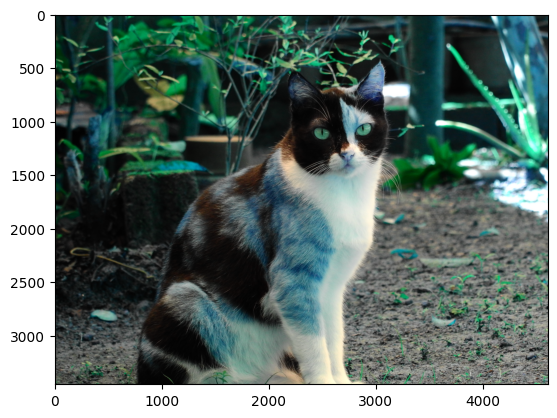

In [111]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar berwarna (BGR)
img = cv.imread('/content/drive/MyDrive/PCVK/British_shorthair_with_calico_coat_(1).jpg')
plt.imshow(img)  # perhatikan hasilnya adalah citra dengan channel warna BGR

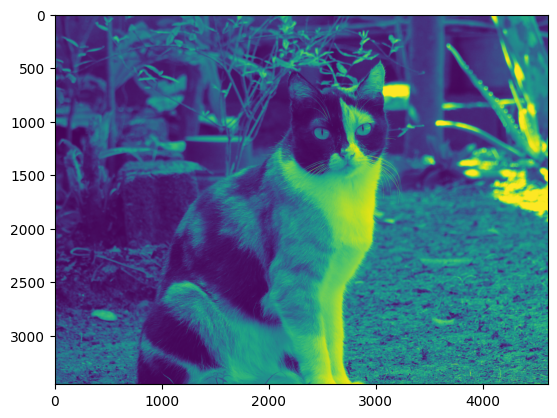

In [112]:
# Membaca gambar grayscale
img_gray = cv.imread('/content/drive/MyDrive/PCVK/British_shorthair_with_calico_coat_(1).jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

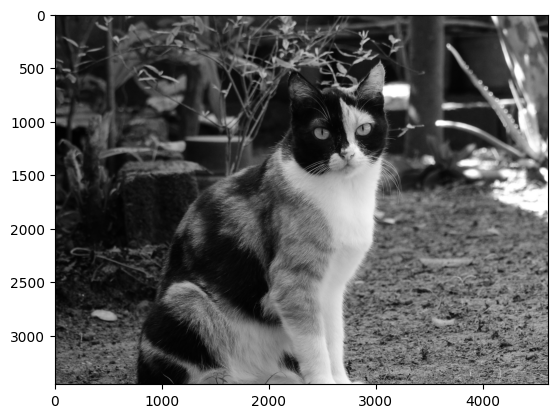

In [113]:
# Menampilkan grayscale dengan colormap lain
plt.imshow(img_gray, cmap='gray')

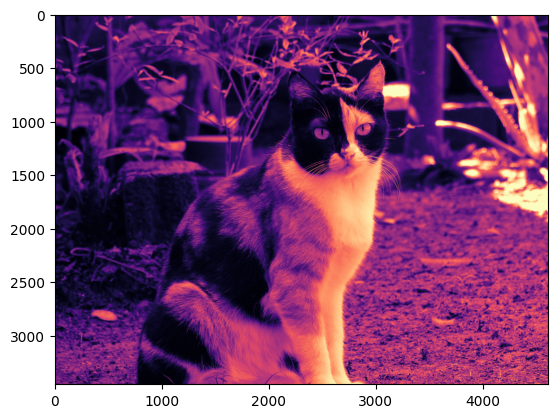

In [114]:
# Menampilkan grayscale dengan colormap lain
plt.imshow(img_gray, cmap='magma')

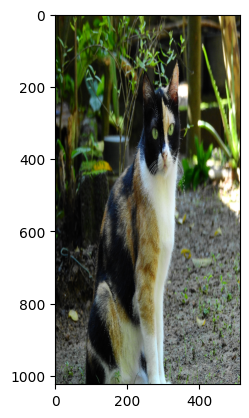

In [115]:
# Resize gambar dan konversi BGR ke RGB
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512, 1024))
plt.imshow(img4)

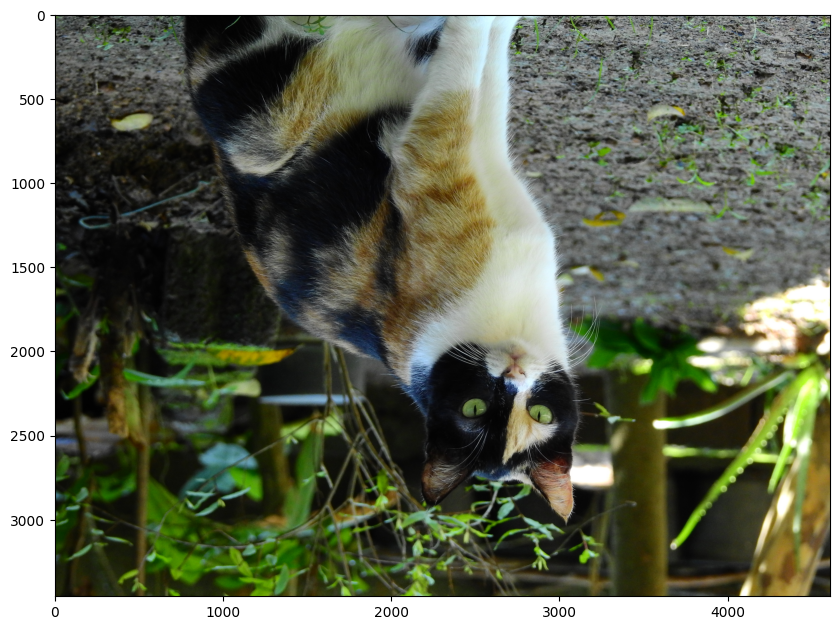

In [116]:
# Flip gambar secara vertikal (0 = vertical, 1 = horizontal, -1 = keduanya)
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

# Tampilkan dengan ukuran canvas yang lebih besar
fig = plt.figure(figsize=(10,10))  # ubah ukuran sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

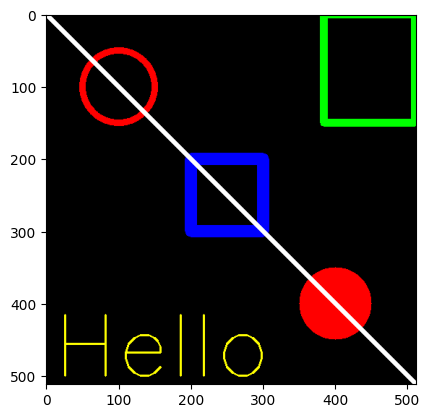

In [117]:
# Membuat gambar hitam (kosong) dengan ukuran 512x512
black_img = np.zeros(shape=(512,512,3), dtype=np.int16)
# Lingkaran merah
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)

# Persegi biru
cv.rectangle(black_img, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)

# Persegi hijau
cv.rectangle(black_img, pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)

# Lingkaran merah
cv.circle(black_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1)

font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(
    black_img,
    text='Hello',
    org=(10,500),
    fontFace=font,
    fontScale=4,
    color=(255,255,0),
    thickness=2,
    lineType=cv.LINE_AA
)
cv.line(
    black_img,
    pt1=(0,0),
    pt2=(512,512),
    color=(255,255,255),
    thickness=5
)

plt.imshow(black_img)

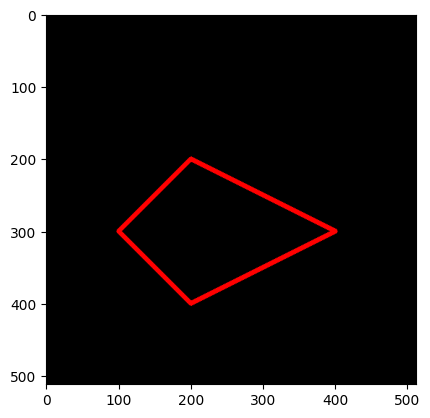

In [118]:
black_img2 = np.zeros(shape=(512,512,3), dtype=np.int32)

vertices = np.array(
    [[100,300], [200,200], [400,300], [200,400]],
    dtype=np.int32
)
vertices

pts = vertices.reshape((-1,1,2))   # nilai 2 untuk menunjukkan bahwa tiap titik dibuat 3 channel yg mewakili R, G, dan B
pts

cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)

plt.imshow(black_img2)

### **PERTANYAAN PRAKTIKUM D3**

**1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib?**

* **Tanpa matplotlib (misalnya dengan `cv2.imshow`)** → gambar ditampilkan menggunakan window bawaan OpenCV, warna default adalah **BGR**.
* **Dengan matplotlib (`plt.imshow`)** → gambar ditampilkan dalam **notebook/jupyter** atau inline, warna default adalah **RGB**. Jika tidak dikonversi, warnanya bisa terlihat salah (misalnya biru jadi merah).

---

**2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16 dan int32?**

* **int16** → hanya bisa menyimpan nilai pixel pada rentang -32,768 s.d. 32,767. Jika nilai pixel keluar dari rentang, akan terjadi **overflow/underflow** sehingga warna tidak tampil sesuai harapan.
* **int32** → bisa menyimpan nilai pixel yang jauh lebih besar (-2 milyar s.d. 2 milyar), sehingga lebih aman terhadap operasi perhitungan.
  untuk citra standar (0–255), umumnya digunakan `uint8`. Jika memakai `int16` atau `int32`, citra tetap hitam karena nilainya nol, tetapi saat operasi matematika (filter, brightness, dsb.) hasilnya bisa berbeda.

---

**3. Apakah kegunaan `from google.colab.patches import cv2_imshow` pada potongan kode berikut?**

  ```python
  from google.colab.patches import cv2_imshow
  from skimage import io
  ```
* `cv2_imshow` adalah **fungsi pengganti** yang memungkinkan gambar ditampilkan langsung di cell output Google Colab.

---

**4. Apakah kegunaan `from skimage import io` pada potongan kode soal nomor 3?**

* `skimage.io` menyediakan fungsi seperti `io.imread()` dan `io.imshow()`.
* **Kegunaannya**: untuk **membaca, menulis, dan menampilkan** gambar dengan cara yang lebih sederhana dibanding OpenCV. Contoh:





# TUGAS PRAKTIKUM D3
Berdasarkan praktikum bagian 1 dan 2 kerjakan beberapa tugas berikut :
1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga berubah?
2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!
3. Tampilkan image baris ke 20-115, kolom 25-120!
4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!
5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. disarankan menggunakan bilangan acak/random!
6. Tampilkan image dengan posisi terbalik!

Berdasarkan praktikum bagian 3 dan 4 kerjakan beberapa tugas berikut :

7. Buat rectangle dan circle pada bagian wajah dari image foto s anda saat
beraktifitas (bukan pasfoto).
8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space
RGB dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/
peppers!  
9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font,
ukuran font, dan warna font yang sesuai keinginan anda.
10. Tunjukkan code program anda pada bapak/ibu dosen

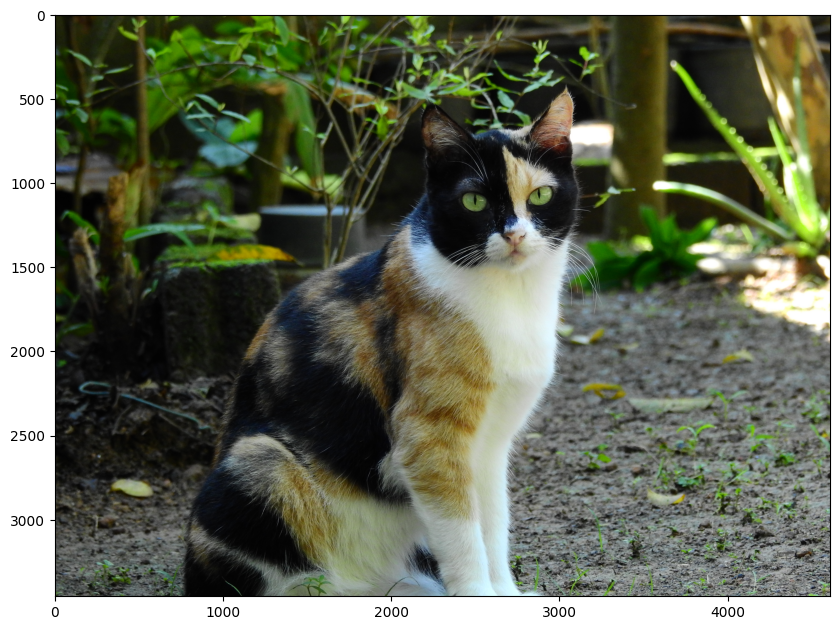

In [119]:
img6 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img6)

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

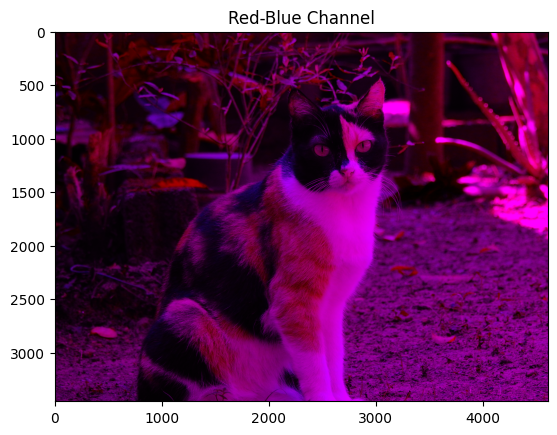

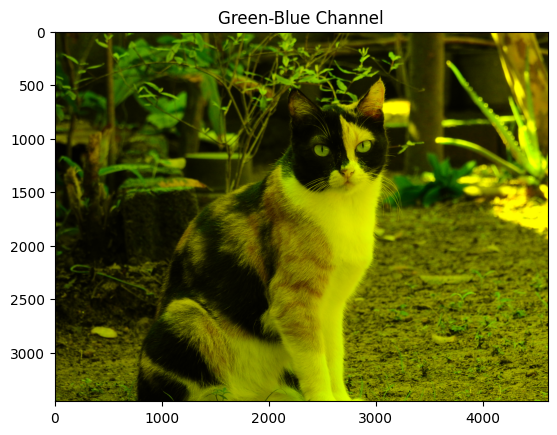

In [120]:
img_rb = img.copy()
img_rb[:, :, 1] = 0
plt.imshow(cv.cvtColor(img_rb, cv.COLOR_BGR2RGB))
plt.title('Red-Blue Channel')
plt.show()

img_gb = img.copy()
img_gb[:, :, 0] = 0
plt.imshow(cv.cvtColor(img_gb, cv.COLOR_BGR2RGB))
plt.title('Green-Blue Channel')
plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120!

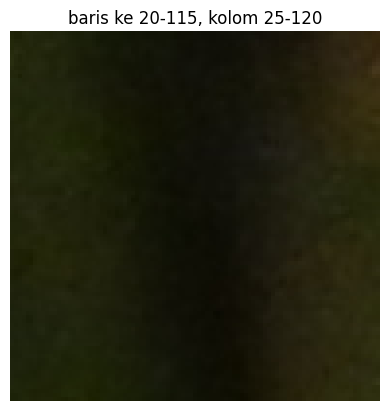

In [121]:
cropped_img = img[20:115, 25:120]
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))
plt.title('baris ke 20-115, kolom 25-120')
plt.axis('off')
plt.show()

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

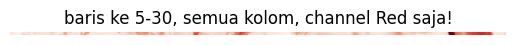

In [122]:
red_channel = img[5:30, :, 2]
plt.imshow(red_channel, cmap='Reds')
plt.title('baris ke 5-30, semua kolom, channel Red saja!')
plt.axis("off")
plt.show()

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. disarankan menggunakan bilangan acak/random!

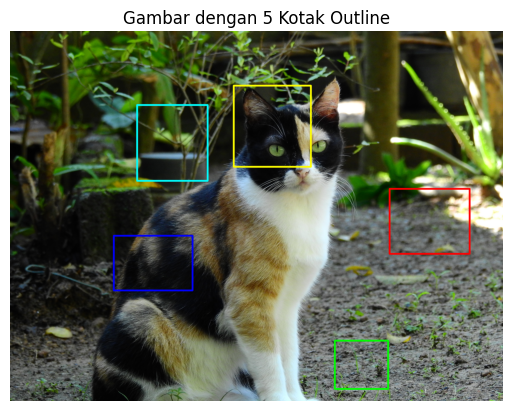

In [123]:
import random
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/PCVK/British_shorthair_with_calico_coat_(1).jpg')

height, width, _ = img.shape

colors = [
    (255, 0, 0),    # Biru
    (0, 255, 0),    # Hijau
    (0, 0, 255),    # Merah
    (255, 255, 0),  # Cyan
    (0, 255, 255)   # Kuning
]

img_boxes = img.copy()

for i, color in enumerate(colors):  # tiap kotak pakai warna berbeda
    # Posisi acak
    x1 = random.randint(0, width - 200)
    y1 = random.randint(0, height - 200)

    # Ukuran acak lebih besar (400–800 px)
    w = random.randint(400, 800)
    h = random.randint(400, 800)

    # Pastikan tidak keluar batas gambar
    x2 = min(x1 + w, width - 1)
    y2 = min(y1 + h, height - 1)

    # Kotak lebih tebal (15 px)
    cv.rectangle(img_boxes, (x1, y1), (x2, y2), color, 15)

plt.imshow(cv.cvtColor(img_boxes, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Gambar dengan 5 Kotak Outline")
plt.show()


6. Tampilkan image dengan posisi terbalik!

Text(0.5, 1.0, 'Terbalik')

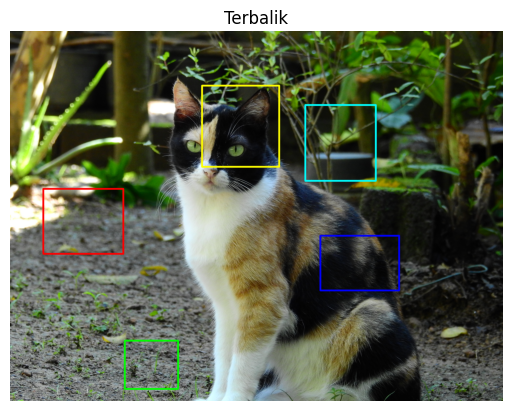

In [124]:
flipped = cv.flip(img_boxes, 1)
plt.imshow(cv.cvtColor(flipped, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Terbalik")

7. Buat rectangle dan circle pada bagian wajah dari image foto s anda saat beraktifitas (bukan pasfoto).

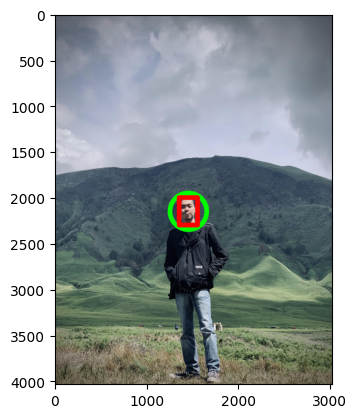

In [125]:
gambar = cv.imread('/content/drive/MyDrive/PCVK/activity.JPG')

cv.circle(gambar, center=(center_x, center_y), radius=200, color=(0, 255, 0), thickness=50)
center_x = 1450
center_y = 2150
cv.rectangle(gambar, pt1=(1350, 2000), pt2=(1550, 2300), color=(0, 0, 255), thickness=50)
gambar_rgb = cv.cvtColor(gambar, cv.COLOR_BGR2RGB)

plt.imshow(gambar_rgb)
plt.show()

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!

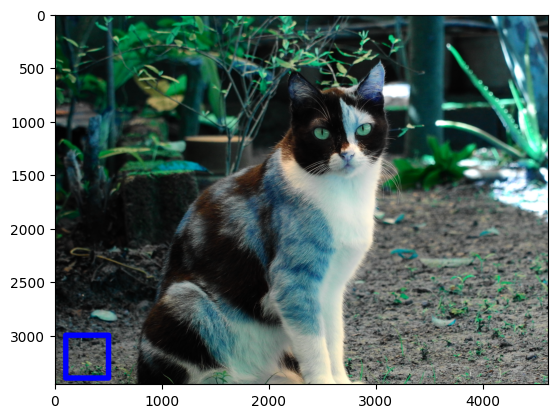

In [126]:
img = cv.imread('/content/drive/MyDrive/PCVK/British_shorthair_with_calico_coat_(1).jpg')
x_b, y_b, w_b, h_b = 100, 3000, 400, 400
cv.rectangle(img, (x_b, y_b), (x_b+w_b, y_b+h_b), (0, 0, 255), 50)
plt.imshow(img)

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran font, dan warna font yang sesuai keinginan anda.

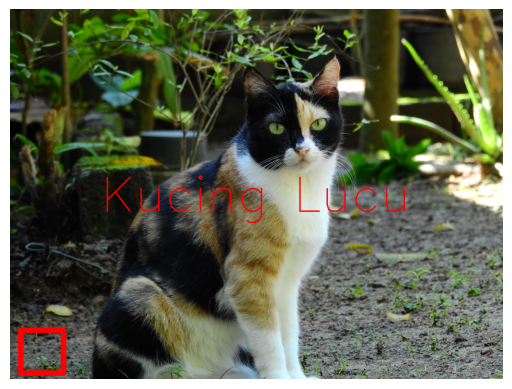

In [127]:
font = cv.FONT_HERSHEY_SIMPLEX
text = "Kucing Lucu"
(h, w, _) = img.shape

# Dapat ukuran teks
(text_w, text_h), baseline = cv.getTextSize(text, font, 15, 12)

# Hitung koordinat supaya teks pas di tengah
org = ((w - text_w) // 2, (h + text_h) // 2)

cv.putText(img, text, org, font, 15, (0,0,255), 12, cv.LINE_AA)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
